In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

from utils import *
from plot_utils import sfac_plotter
from AnalyseDefects_dev import AnalyseDefects

In [9]:
def gen_analysis_dict(LL, mode):

    dshort = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\nematic_analysis{LL}_LL0.05', \
              suffix = "short", priority = -1, LX = LL, Nframes = 181)
    dlong = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\nematic_analysis{LL}_LL0.05_long', \
                suffix = "long", priority = 1, LX = LL, Nframes = 400)
    priority_vl = 2 if LL == 512 else 3
    dvery_long = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\nematic_analysis{LL}_LL0.05_very_long',\
                    suffix = "very_long", priority = priority_vl, LX = LL, Nframes = 1500)
    dvery_long2 = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\nematic_analysis{LL}_LL0.05_very_long_v2',\
                    suffix = "very_long2", priority = 3 if priority_vl == 2 else 2, LX = LL, Nframes = 1500)

    if mode == 'all':
        if LL == 2048:
            defect_list = [dshort, dlong]
        else:
            defect_list = [dshort, dlong, dvery_long, dvery_long2] if LL in [256] else [dshort, dlong, dvery_long]
    else:
        defect_list = [dshort]
    
    return defect_list

def gen_analysis_dict_new(LL, mode):

    dshort = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\na{LL}', \
              suffix = "short", priority = 0, LX = LL, Nframes = 181)
    dlong = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\na{LL}l', \
                suffix = "long", priority = 1, LX = LL, Nframes = 400)
    dvery_long = dict(path =  f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\na{LL}vl', \
                    suffix = "very_long", priority = 2, LX = LL, Nframes = 1500)
    
    if mode == 'all':
        if LL == 2048:
            defect_list = [dshort, dlong]
        else:
            defect_list = [dshort, dlong, dvery_long]
    else:
        defect_list = [dshort]
    
    return defect_list

for LL in [2048]:#512, 1024, 2048]:
#LL = 256
    output_path = f'data\\na{LL}'
    mode = 'all' # 'all' or 'short'

    defect_list = gen_analysis_dict_new(LL, mode)

    ad = AnalyseDefects(defect_list, output_path=output_path)

    extract = False
    analyze = False
    merge = False

    # hyperuniformity parameters
    act_idx_bounds=[0,None]
    Npoints_to_fit = 8
    Nbounds = [[3,n] for n in range(5,9)]
    dens_fluc_dict = dict(act_idx_bounds = [0, None], window_idx_bounds = [30 - Npoints_to_fit, None])
    sfac_dict = dict(Npoints_bounds = Nbounds[0], act_idx_bounds = act_idx_bounds,)
    if extract:
        ad.extract_results(save=True)
    if analyze:
        ad.analyze_defects()#dens_fluc_dict=dens_fluc_dict, sfac_dict = sfac_dict, calc_pcf=True)
    if merge:
        ad.merge_results()

In [50]:
conv_list = [0, 0, 750, 750, 750, 0, 750]
conv_list = ad.conv_list[0]
np.savetxt(os.path.join(ad.output_paths[0], 'conv_list.txt'), conv_list)


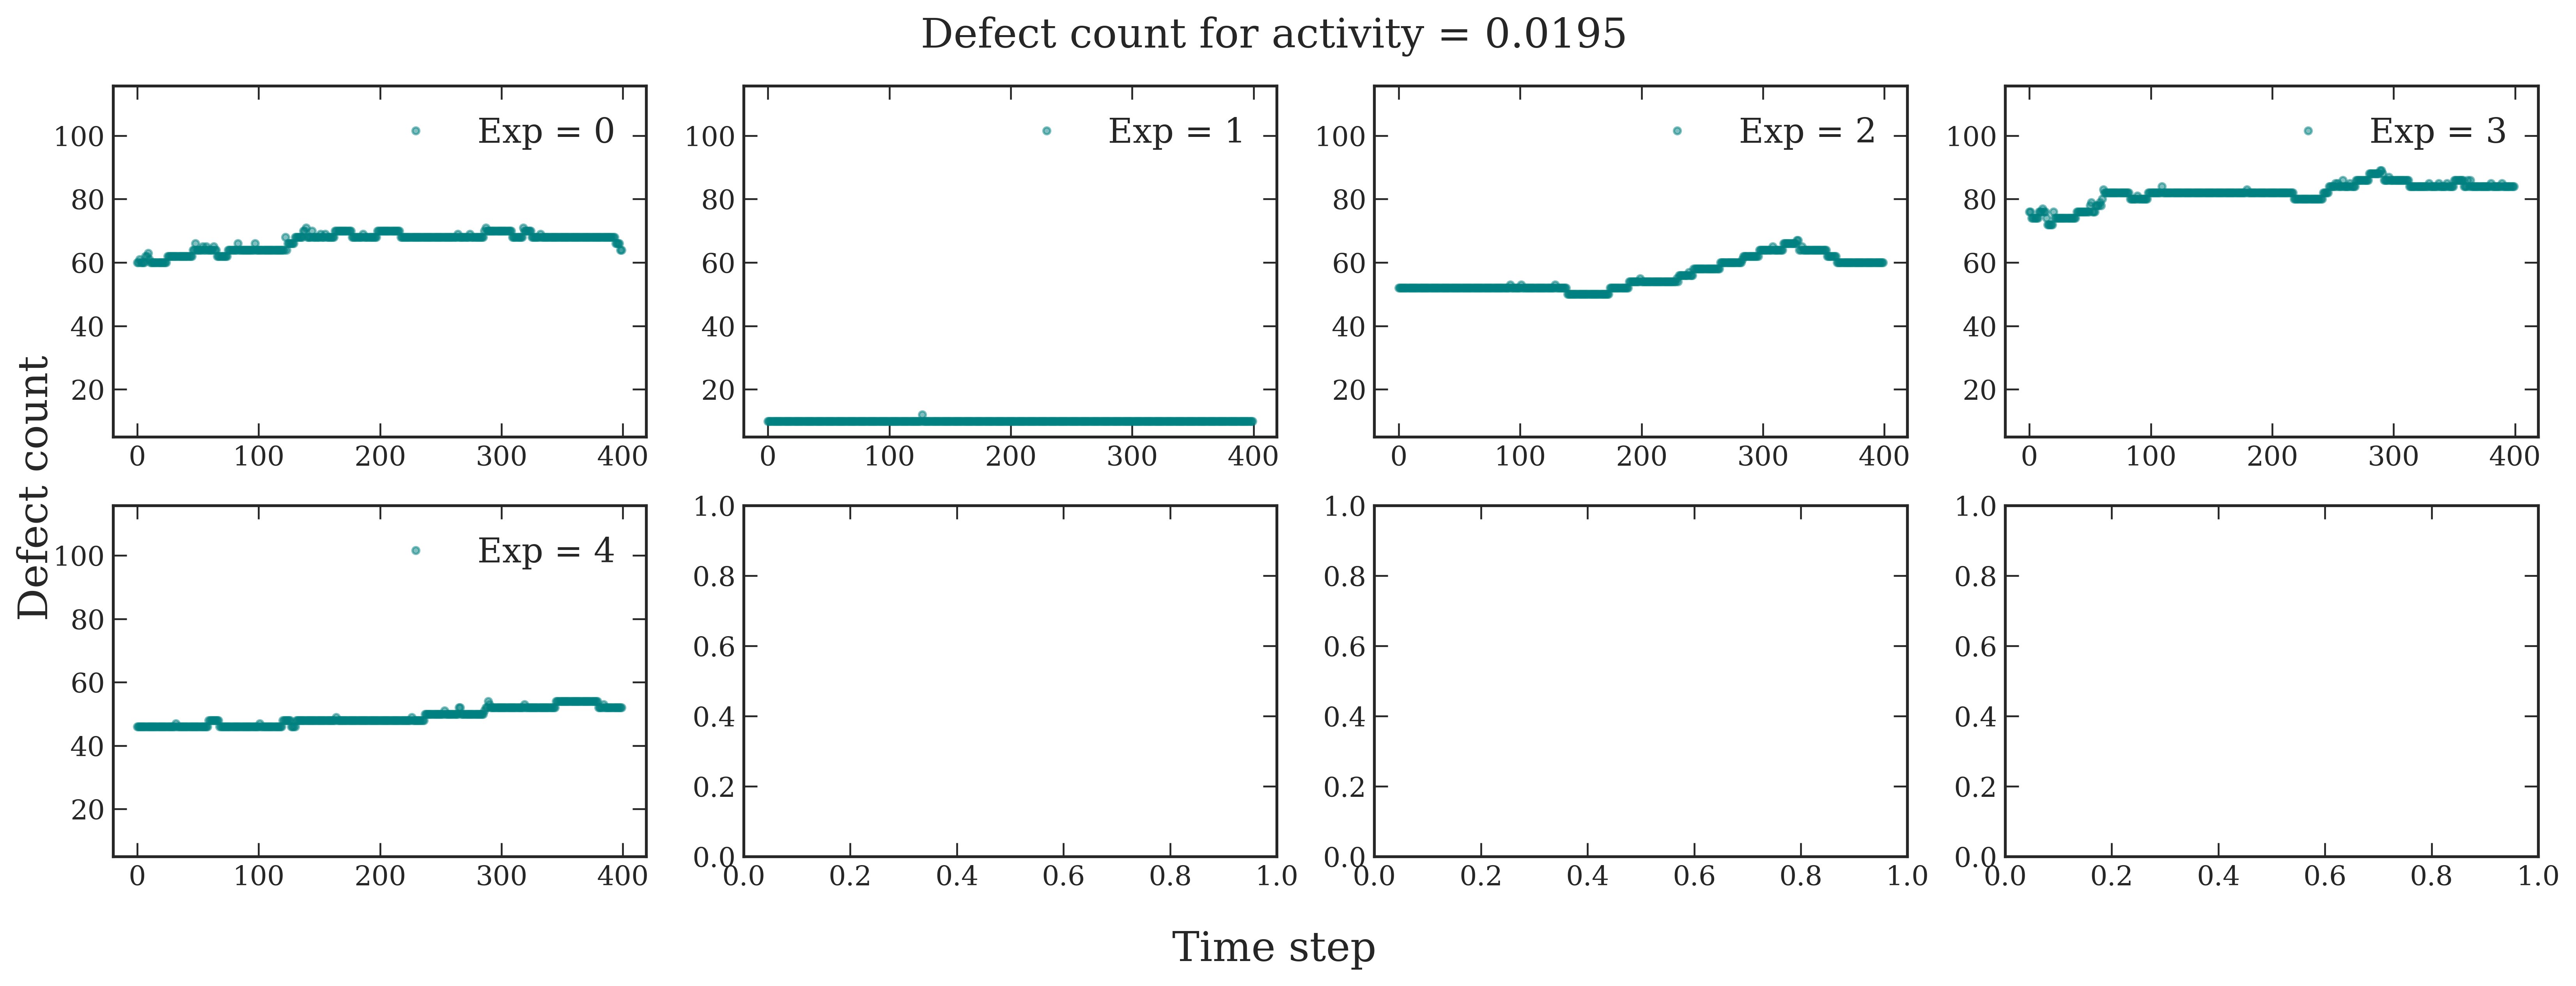

In [11]:
ad.plot_defects_per_exp(-1, [1,2])

In [ ]:
LL=2048
Nexp=5
path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\nematic_analysis{LL}_LL0.05_longe\\analysis_zeta0.0225'
path0 = path# f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\nematic_analysis{LL}_LL0.05_long'
act_list = ad.act_list[-1]
def_arr = np.zeros((1501, len(act_list), 5))
act=0.0225
 #   act = act if act !=0.02 else '0.020'
  #  act_path = os.path.join(path, f'analysis_zeta_{act}')
for exp in range(Nexp):
    act_path_exp = os.path.join(path, f'zeta_{act}_counter_{exp}')
    defects = np.loadtxt(os.path.join(act_path_exp, 'Ndefects.txt'))
    if act == 0.0225:
        act_path_exp0 = os.path.join(path0, f'analysis_zeta_{act}', f'zeta_{act}_counter_{exp}')
        print(os.path.isfile(os.path.join(act_path_exp0, f'Ndefects_act{act}_exp{exp}.txt')))

        np.savetxt(os.path.join(act_path_exp0, f'Ndefects_act{act}_exp{exp}.txt'), defects)
    def_arr[-defects.shape[0]:, i, exp] = np.loadtxt(os.path.join(act_path_exp, 'Ndefects.txt'))

In [ ]:
ninfo = 500
tau_simple = True

fig, ax = plt.subplots(ncols=1,nrows=1, figsize = (4,4))
color = ['r','g','b', 'k']
marker = ['o','s','^','d']

act_sigma = [0.0205, 0.021,0.0215,0.022]#, 0.023]
sigma_arr = np.zeros([4,len(act_sigma),2])

L_list = [256,512,1024]  #,2048]
act_min_idx_list = [3, 3, 2]

for j, LL in enumerate(L_list):

    output_path = f'data\\nematic_analysis{LL}_LL0.05'
    mode = 'all' # 'all' or 'short'

    defect_list = gen_analysis_dict(LL, mode)

    ad = AnalyseDefects(defect_list, output_path=output_path)

    out_path_merged = ad.output_main_path + '\\merged_results'

    order_param_av = np.load(out_path_merged + '\\order_param_av.npy')
    act_list = np.load(out_path_merged + '\\activity_list.npy')[act_min_idx_list[j]:]   
    corr_time_av = np.load(out_path_merged + '\\corr_time_av.npy')[:,act_min_idx_list[j]:,:]

    corr_time_av *= ninfo

    if LL == 1024:
        act22_idx = np.where(act_list==0.022)[0][0]
        corr_time_av[:,act22_idx,0] *= 8

    ax.errorbar(act_list,corr_time_av[1 if tau_simple else 0,:,0], yerr=corr_time_av[1 if tau_simple else 0,:,1], 
                label=f'L={LL}', fmt='o-', marker=marker[j], alpha=.6)

ax.legend();
ax.set_xlim([0.018,0.04])
ax.set_xlabel(r'Activity ($\zeta$)')
ax.set_ylabel(r'Decorrelation time ($\overline{\tau}_c$)')
fig.tight_layout()

In [ ]:
ad.extract_results()

In [ ]:
ad.analyze_defects()

In [5]:
if extract:
    ad.extract_results()
if analyze:
    ad.analyze_defects()
if merge:
    ad.merge_results()

In [ ]:
for Ndataset in range(ad.Ndata):
    ad.plot_defects_per_activity(Ndataset=Ndataset, save=True)
ad.plot_defects_per_activity(use_merged=True, save=True)

In [ ]:
for Ndataset in range(ad.Ndata):
    ad.plot_hyperuniformity_sfac(Ndataset=Ndataset, weighted=False, save = True);

In [145]:
def plot_density_fluctuation_time_av(ad_object, Ndataset = 0, activity_list = [], act_idx_bounds = None, \
                                     window_idx_bounds = None, use_merged = False, save = False):
        
        LX = ad_object.LX[Ndataset]
        Ndataset = Ndataset if not use_merged else 0
        output_path = ad_object.output_path[Ndataset] if not use_merged else f'data\\nematic_analysis{LX}_LL0.05\\merged_results'
        custom_act_list = True if len(activity_list) > 0 else False
           
        if window_idx_bounds is None:
            window_idx_bounds = [0, len(ad_object.window_sizes[Ndataset])]
        if act_idx_bounds is None or custom_act_list:
            act_idx_bounds = [0, len(ad_object.act_list[Ndataset])]

        window_sizes = ad_object.window_sizes[Ndataset][window_idx_bounds[0]:window_idx_bounds[1]]
        act_list = ad_object.act_list[Ndataset][act_idx_bounds[0]:act_idx_bounds[1]]

        try:
            av_def = ad_object.get_arrays_av(Ndataset = Ndataset, use_merged = use_merged)[-1] / LX

            dens_fluc_av = ad_object.get_arrays_av(Ndataset = Ndataset, use_merged = use_merged)[-2][:, window_idx_bounds[0]:window_idx_bounds[1], act_idx_bounds[0]:act_idx_bounds[1]]
            
        except: 
            print('Density fluctuations not found. Analyse defects first.')
            return
        
       # dens_fluc_av *= av_def[:,0][None, None, :, None]

        min_vals = []

        fig, ax = plt.subplots(figsize=(8,6))
        for i, act in enumerate(act_list):
            if custom_act_list:
                if act not in activity_list:
                    continue

            act_idx = ad_object.act_list[Ndataset].index(act)

            dens_time_av = np.nanmean(dens_fluc_av[ad_object.conv_list[Ndataset][act_idx]:, :, i, 0], axis = 0)
            dens_time_std = np.nanstd(dens_fluc_av[ad_object.conv_list[Ndataset][act_idx]:, :, i, 0], axis = 0) \
                / np.sqrt(ad_object.Nframes[Ndataset] - ad_object.conv_list[Ndataset][act_idx])
            min_vals.append(dens_time_av[0])
            ax.errorbar(window_sizes, dens_time_av, dens_time_std, fmt='.', label = rf'$\zeta$ = {act}',\
                        capsize=2, capthick=1, elinewidth=1, markeredgewidth=2, alpha = 0.5, markersize=4)


        xticks = np.array([0.5, 1, 2.5, 5, 7.5, 10]) * ad_object.LX[Ndataset] / 100
        ax.set(xlabel = 'Window size / L ', ylabel = r'$\overline{\delta \rho ^2} ~/~ (\overline{\rho})^2$',\
               yscale = 'log', xscale = 'log', xticks = xticks, xticklabels = np.round(xticks / LX,3))
        ax.xaxis.set_minor_locator(ticker.NullLocator())
        ax.legend(fontsize = 12, ncol=3, loc = 'lower left')   
        fig.suptitle(rf'Time av. of $ \delta \rho^2$ vs window size (L = {LX})')
        fig.tight_layout()

        if save:
            if not os.path.isdir(os.path.join(output_path, 'figs')):
                os.makedirs(os.path.join(output_path, 'figs'))
            fig.savefig(os.path.join(output_path, f'figs\\dens_fluc_time_av.png'), dpi = 420, pad_inches=0.25)       
        return fig, ax, min_vals

In [ ]:
window_idx_bounds = [0, None]
act_idx_bounds = [4, -4]

acts_to_pop = [.024, .025, .026, 0.03, .032, 0.034, .04, .06]
acts_to_use = list(ad.act_list[0][act_idx_bounds[0]:act_idx_bounds[1]])
for act in acts_to_pop:
    acts_to_use.remove(act)
fig, ax, min_vals = plot_density_fluctuation_time_av(ad, activity_list=acts_to_use, act_idx_bounds = act_idx_bounds, \
                                           window_idx_bounds = window_idx_bounds, use_merged = True, save = True)

window_sizes = ad.window_sizes[0][window_idx_bounds[0]:window_idx_bounds[1]] #/ ad.LX[0]
min_val = 6

for i, val_idx in enumerate([1, 3]):
    val = min_vals[val_idx] 


    label = r'$\sim R^{-2}$' if i == 0 else None
    ax.plot(window_sizes, (val * window_sizes[0] ** 2) / window_sizes ** 2, \
            '--', color='black', alpha=0.7, lw = 1.7, label = label)


#ax.plot(window_sizes, (min_val * window_sizes[0] ** 2) / window_sizes ** 2, '--', color='black', alpha=0.7, lw = 1.7)
ax.text(0.8, 0.95, r'---- $\sim R^{-2}$', fontsize=18, transform=ax.transAxes, verticalalignment='top', fontweight='normal')
#ax.plot(window_sizes, (1 * window_sizes[0] ** 2) / window_sizes ** 2, '--', color='black', alpha=0.7, lw = 1.7)
#ax.plot(window_sizes, 13000/ window_sizes ** 3, '--', color='black', alpha=0.7, lw = 1.7)
#ax.text(0.15, 0.95, r'$\sim R^{-3}$', transform=ax.transAxes, fontsize=15, verticalalignment='top', fontweight='normal')
#ax.plot(window_sizes, (min_vals[1] * window_sizes[0] ** 2) / window_sizes ** 2, '--', color='black', alpha=0.7, lw = 1.7)
#ax.set_ylim(bottom = 7e-4, top = 40)
#ax.legend(ncol=2)
output_path = f'data\\nematic_analysis{LL}_LL0.05\\merged_results'
fig.savefig(os.path.join(output_path, f'figs\\dens_fluc_time_av.png'), dpi = 420, pad_inches=0.25)
